# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2381 Ахметгареев Карим Ильгизович и Самулевич Степан Александрович. Вариант №1.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import random

## Основные теоретические положения
### Дискретизация сигнала

Исходный непрерывный сигнал задаётся суммой гармоник:

$$
x(t) = \sum_{k=1}^{11} A_k \cos(\omega_k t + \varphi_k)
$$

где частоты $\omega_k$ упорядочены по возрастанию с шагом $\Delta\omega = 0.1\pi$, амплитуды $A_k$ — целые числа от 1 до 11, фазы $\varphi_k$ — случайные величины из интервала $[0, 0.5]$.

Дискретизация выполняется с шагом $T = 1$, формируя последовательность из $N = 32$ отсчётов.

Фильтры линейного сглаживания по M точкам:
$$y[n] = \frac{1}{M} \sum_{i=-N}^{N} x[n-i]$$
$$H(\omega) = \frac{1}{M} \cdot e^{-j\omega\frac{M-1}{2}} \cdot \frac{\sin\left(\frac{\omega M}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}$$

Фильтр, соответствующий формуле численного дифференцирования:
 $$y[n] = \frac{x[n+1]-x[n-1]}{2T}$$

Передаточоная функция
$$H(\omega) = \frac{e^{j\omega} - e^{-j\omega}}{2T} = j \cdot \frac{\sin\left({\omega}\right)}{T}$$

Фильтры, соответствующие формулам численного интегрирования:
1. Формула прямоугольников
$$y[n] = y[n-1] + T \cdot x[n]$$
$$H_R(\omega) = \frac{T}{1 - e^{-j\omega}} = -j \cdot \frac{T}{2} \cdot \frac{e^{j\omega/2}}{\sin(\omega/2)}$$
2. Формула трапеции
$$y[n] = y[n-1] + \frac{T}{2} \cdot (x[n] + x[n-1])$$
$$H_T(\omega) = \frac{T}{2} \cdot \frac{1 + e^{-j\omega}}{1 - e^{-j\omega}} = -j \cdot \frac{T}{2} \cdot \cot\left(\frac{\omega}{2}\right)$$
3. Формула Симпсона
$$y[n] = y[n-2] + \frac{T}{3} \cdot (x[n] + 4x[n-1] + x[n-2])$$
$$$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import random

### Задание 1

In [4]:
T = 1
N = 32
num_harmonics = 11
delta_omega = 0.1 * np.pi

A_k = np.random.randint(1, 12, size=num_harmonics)

A_k = A_k / np.sum(A_k)

omega_k = np.arange(0, num_harmonics) * delta_omega

phi_k = np.random.rand(num_harmonics) * 0.5

n = np.arange(N)
t_discrete = n * T

t_analog = np.linspace(0, (N-1)*T, 1000)

x_discrete = np.zeros(N)
x_analog = np.zeros_like(t_analog)

for k in range(num_harmonics):
    x_discrete += A_k[k] * np.cos(omega_k[k] * t_discrete + phi_k[k])
    x_analog += A_k[k] * np.cos(omega_k[k] * t_analog + phi_k[k])

print("Параметры гармоник:")
for k in range(num_harmonics):
    print(f"Гармоника {k}: ω={omega_k[k]/np.pi:.1f}π, A={A_k[k]:.4f}, φ={phi_k[k]:.3f}")

Параметры гармоник:
Гармоника 0: ω=0.0π, A=0.1449, φ=0.308
Гармоника 1: ω=0.1π, A=0.0580, φ=0.355
Гармоника 2: ω=0.2π, A=0.0580, φ=0.399
Гармоника 3: ω=0.3π, A=0.1449, φ=0.053
Гармоника 4: ω=0.4π, A=0.1304, φ=0.309
Гармоника 5: ω=0.5π, A=0.0725, φ=0.288
Гармоника 6: ω=0.6π, A=0.0580, φ=0.159
Гармоника 7: ω=0.7π, A=0.0725, φ=0.367
Гармоника 8: ω=0.8π, A=0.1159, φ=0.370
Гармоника 9: ω=0.9π, A=0.0725, φ=0.474
Гармоника 10: ω=1.0π, A=0.0725, φ=0.453


### Задание 2

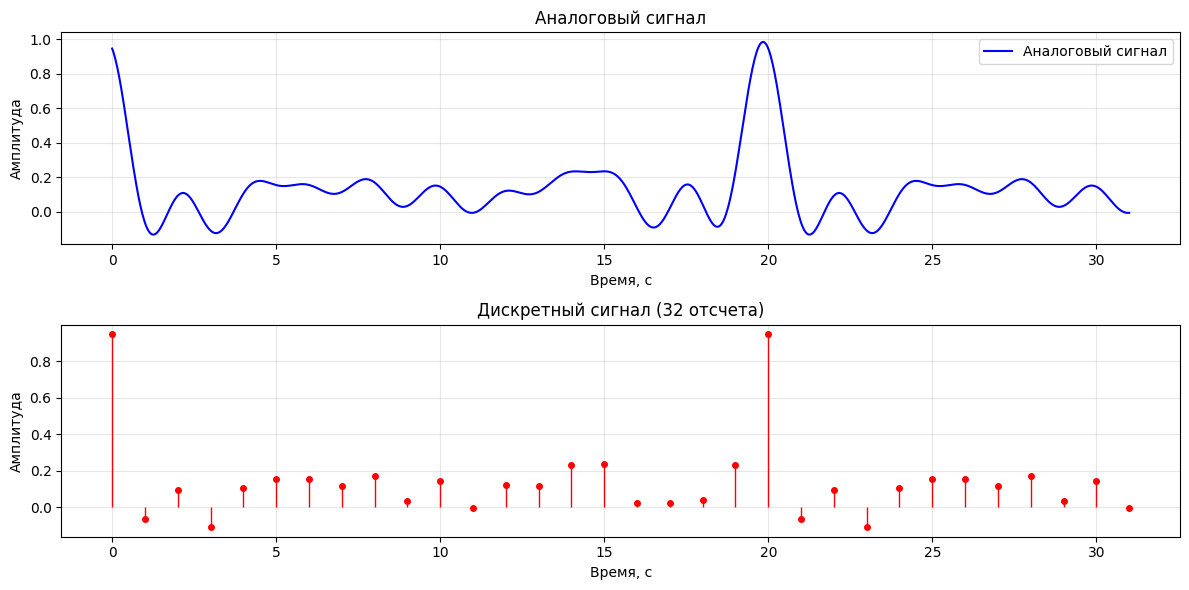

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_analog, x_analog, 'b-', linewidth=1.5, label='Аналоговый сигнал')
plt.title('Аналоговый сигнал')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(t_discrete, x_discrete, 'r-', basefmt=' ')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
plt.setp(markerline, 'color', 'r', 'markersize', 4)
plt.title('Дискретный сигнал (32 отсчета)')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 3

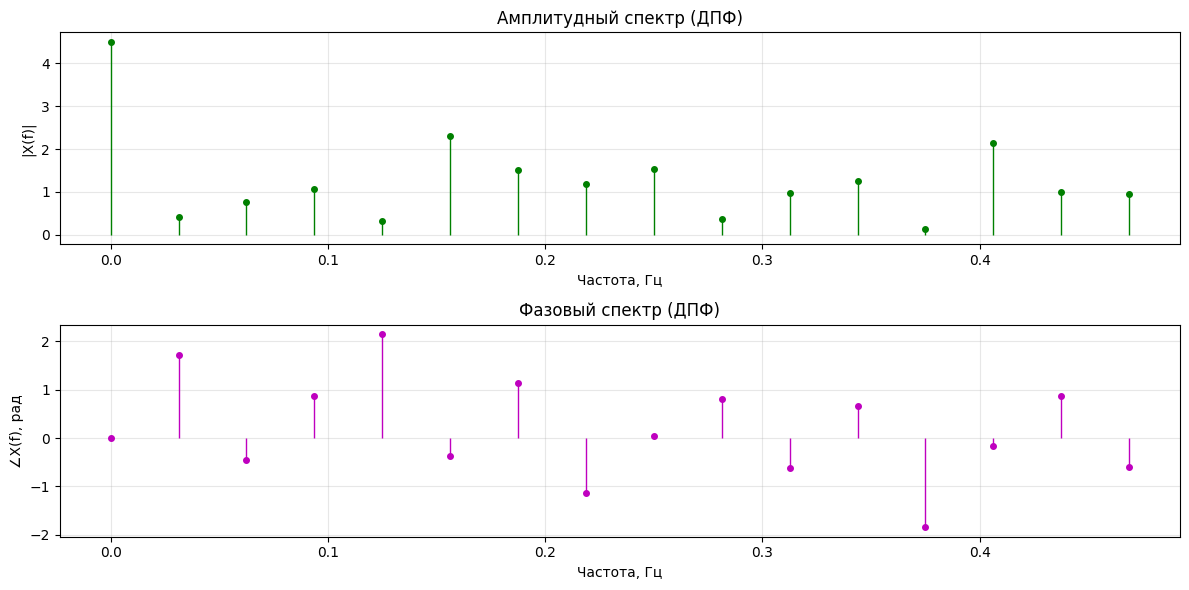

In [6]:
X_discrete = np.fft.fft(x_discrete)
freqs = np.fft.fftfreq(N, T)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_discrete[:N//2]), 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title('Амплитудный спектр (ДПФ)')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.angle(X_discrete[:N//2]), 'm-', basefmt=' ')
plt.setp(stemlines, 'color', 'm', 'linewidth', 1)
plt.setp(markerline, 'color', 'm', 'markersize', 4)
plt.title('Фазовый спектр (ДПФ)')
plt.xlabel('Частота, Гц')
plt.ylabel('∠X(f), рад')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 4

In [16]:
def moving_average_filter(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

window_5 = 5
window_9 = 9

x_smooth_5 = moving_average_filter(x_discrete, window_5)
x_smooth_9 = moving_average_filter(x_discrete, window_9)

def H_moving_average(omega, M):
    if omega == 0:
        return 1
    return np.sin(omega * M / 2) / (M * np.sin(omega / 2))
print("Передаточная функция фильтра скользящего среднего (M точек):")
print("H(ω) = sin(ωM/2) / (M * sin(ω/2))")
print(f"\nДля M={window_5}: H(0) = {H_moving_average(0, window_5):.3f}")
print(f"Для M={window_9}: H(0) = {H_moving_average(0, window_9):.3f}")

Передаточная функция фильтра скользящего среднего (M точек):
H(ω) = sin(ωM/2) / (M * sin(ω/2))

Для M=5: H(0) = 1.000
Для M=9: H(0) = 1.000


In [ ]:
[Зависимость предаточный ф-ции от циклической частоты]

### Задание 5

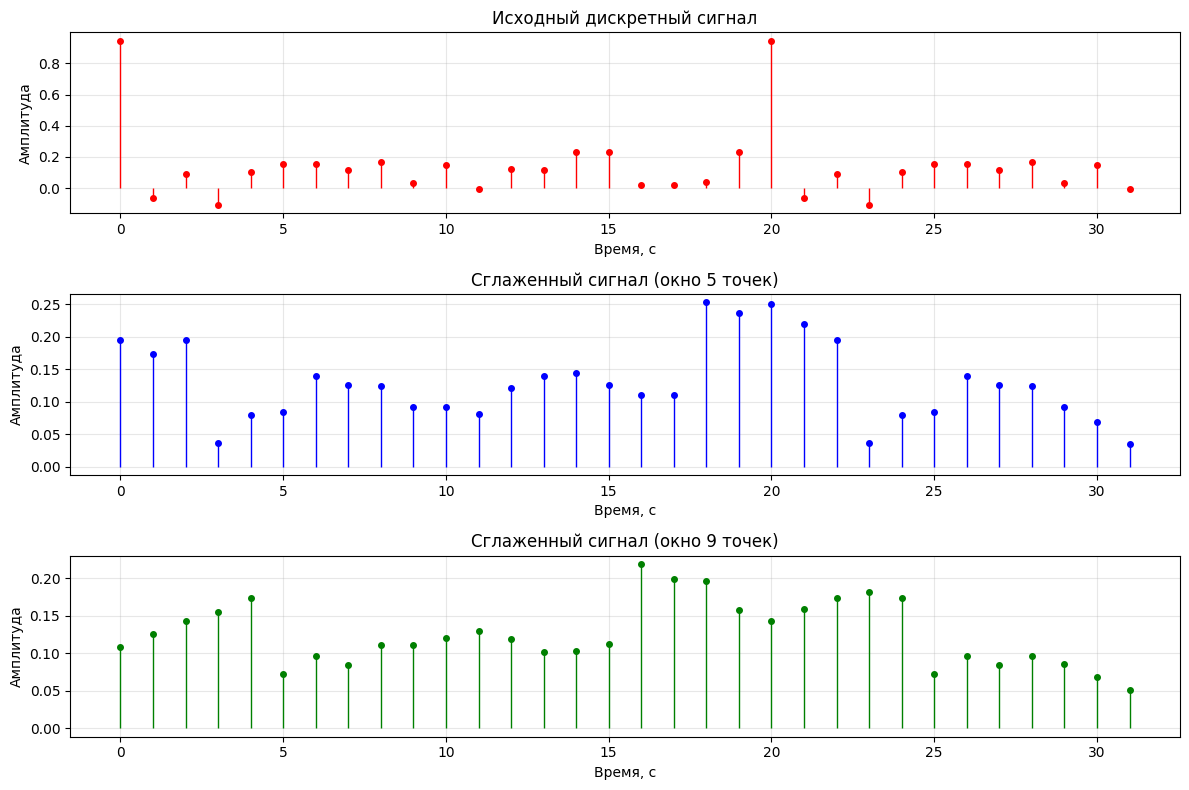

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
markerline, stemlines, baseline = plt.stem(t_discrete, x_discrete, 'r-', basefmt=' ')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
plt.setp(markerline, 'color', 'r', 'markersize', 4)
plt.title('Исходный дискретный сигнал')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
markerline, stemlines, baseline = plt.stem(t_discrete, x_smooth_5, 'b-', basefmt=' ')
plt.setp(stemlines, 'color', 'b', 'linewidth', 1)
plt.setp(markerline, 'color', 'b', 'markersize', 4)
plt.title(f'Сглаженный сигнал (окно {window_5} точек)')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
markerline, stemlines, baseline = plt.stem(t_discrete, x_smooth_9, 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title(f'Сглаженный сигнал (окно {window_9} точек)')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 6

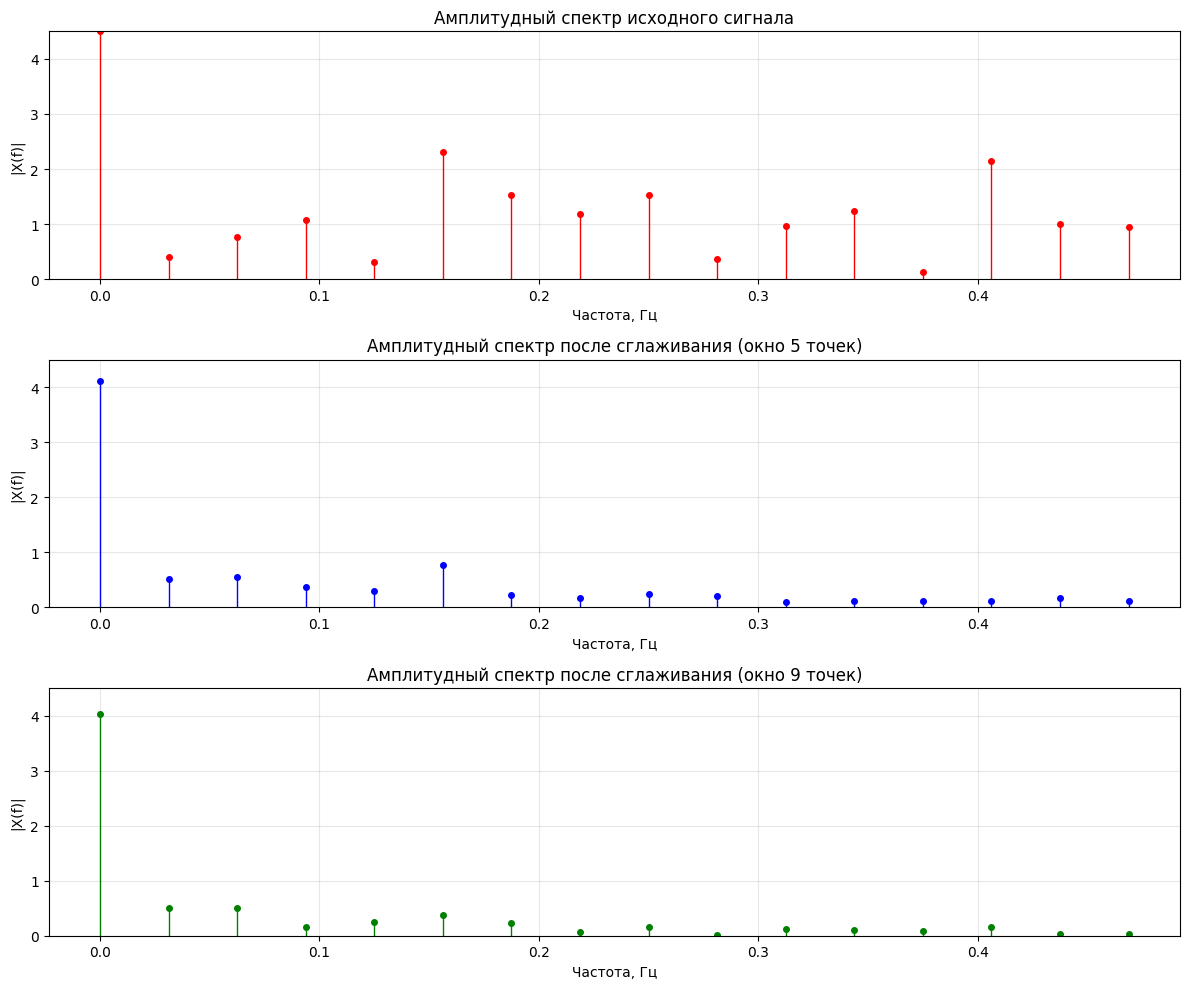

In [9]:
X_smooth_5 = np.fft.fft(x_smooth_5)
X_smooth_9 = np.fft.fft(x_smooth_9)

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_discrete[:N//2]), 'r-', basefmt=' ')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
plt.setp(markerline, 'color', 'r', 'markersize', 4)
plt.title('Амплитудный спектр исходного сигнала')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)
plt.ylim([0, np.max(np.abs(X_discrete))])

plt.subplot(3, 1, 2)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_smooth_5[:N//2]), 'b-', basefmt=' ')
plt.setp(stemlines, 'color', 'b', 'linewidth', 1)
plt.setp(markerline, 'color', 'b', 'markersize', 4)
plt.title(f'Амплитудный спектр после сглаживания (окно {window_5} точек)')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)
plt.ylim([0, np.max(np.abs(X_discrete))])

plt.subplot(3, 1, 3)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_smooth_9[:N//2]), 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title(f'Амплитудный спектр после сглаживания (окно {window_9} точек)')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)
plt.ylim([0, np.max(np.abs(X_discrete))])

plt.tight_layout()
plt.show()

### Задание 7

### 1. Линейное сглаживание (5 и 9 точек)

Анализ спектров отфильтрованных сигналов показал, что фильтры скользящего среднего подавляют высокие частоты и пропускают низкие (являются ФНЧ). Чем больше ширина окна, тем уже полоса пропускания фильтра. На графиках спектров видно, что фильтр по 9 точкам сильнее подавляет высокочастотные составляющие исходного сигнала по сравнению с фильтром по 5 точкам. Это согласуется с теоретическими АЧХ: $|H_5(\omega)|$ и $|H_9(\omega)|$ убывают с ростом частоты, причём $|H_9(\omega)| < |H_5(\omega)|$ для большинства частот.

### 2. Численное дифференцирование

Анализ спектра после дифференцирования показал, что данный фильтр усиливает высокие частоты и подавляет низкие (является ФВЧ). На графике видно, что амплитуды высокочастотных гармоник увеличились, а постоянная составляющая ($\omega=0$) полностью подавлена. Это соответствует теоретической АЧХ $|H_D(\omega)| = \frac{2}{T}|\sin\frac{\omega T}{2}|$, которая равна нулю при $\omega=0$ и возрастает с увеличением частоты до максимума при $\omega=\pi$.



### 3. Численное интегрирование

Метод прямоугольников:

Анализ результатов показал накопление значений сигнала с усилением низкочастотных составляющих. На спектре наблюдается значительное увеличение амплитуды на низких частотах. Это согласуется с тем, что интегрирующий фильтр является ФНЧ с передаточной функцией, стремящейся к бесконечности при $\omega \to 0$.

Метод трапеций:

Результаты аналогичны методу прямоугольников, но с более высокой точностью аппроксимации интеграла. Спектр выходного сигнала демонстрирует усиление низких частот и подавление высоких, что соответствует теоретической АЧХ $H_{trap}(\omega) = \frac{T}{2} \cdot \frac{1 + e^{-j\omega T}}{1 - e^{-j\omega T}}$.

Метод Симпсона:

Обеспечивает наиболее точное численное интегрирование (погрешность $O(T^4)$). На спектре видно характерное для интегрирующих фильтров усиление низкочастотной части сигнала. Сравнение трёх методов показывает схожие результаты, что объясняется достаточно малым шагом дискретизации.


### Задание 8

а)

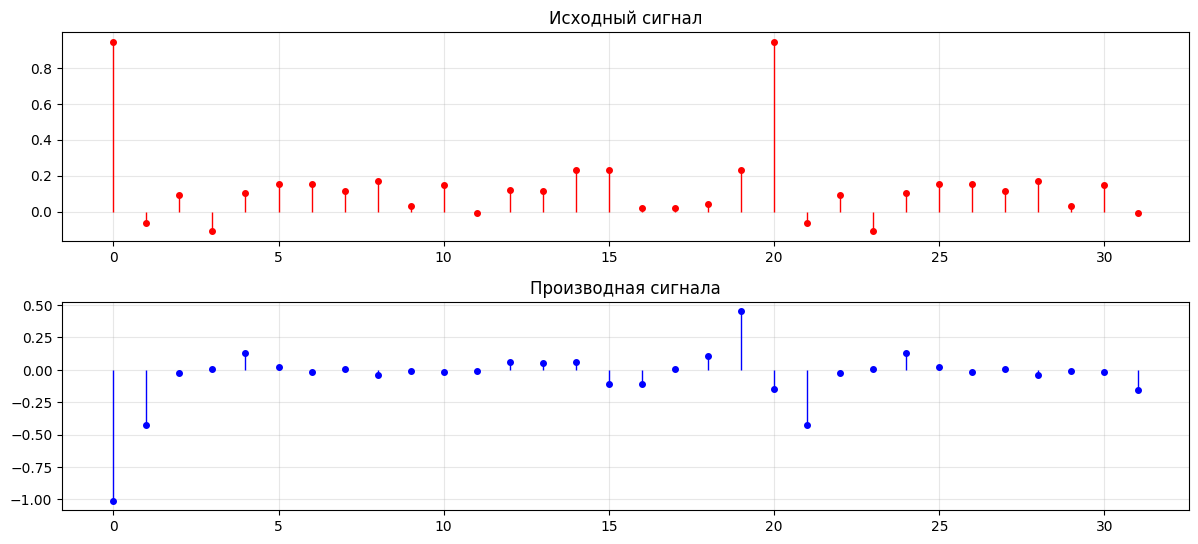

In [10]:
def derivative_filter(signal, T=1):
  y = np.zeros_like(signal, dtype=float)
  y[1:-1] = (signal[2:] - signal[:-2]) / (2*T)
  y[0] = (signal[1] - signal[0]) / T
  y[-1] = (signal[-1] - signal[-2]) / T
  return y

x_derivative = derivative_filter(x_discrete, T)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
markerline, stemlines, baseline = plt.stem(t_discrete, x_discrete, 'r-', basefmt=' ')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
plt.setp(markerline, 'color', 'r', 'markersize', 4)
plt.title('Исходный сигнал')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
markerline, stemlines, baseline = plt.stem(t_discrete, x_derivative, 'b-', basefmt=' ')
plt.setp(stemlines, 'color', 'b', 'linewidth', 1)
plt.setp(markerline, 'color', 'b', 'markersize', 4)
plt.title('Производная сигнала')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

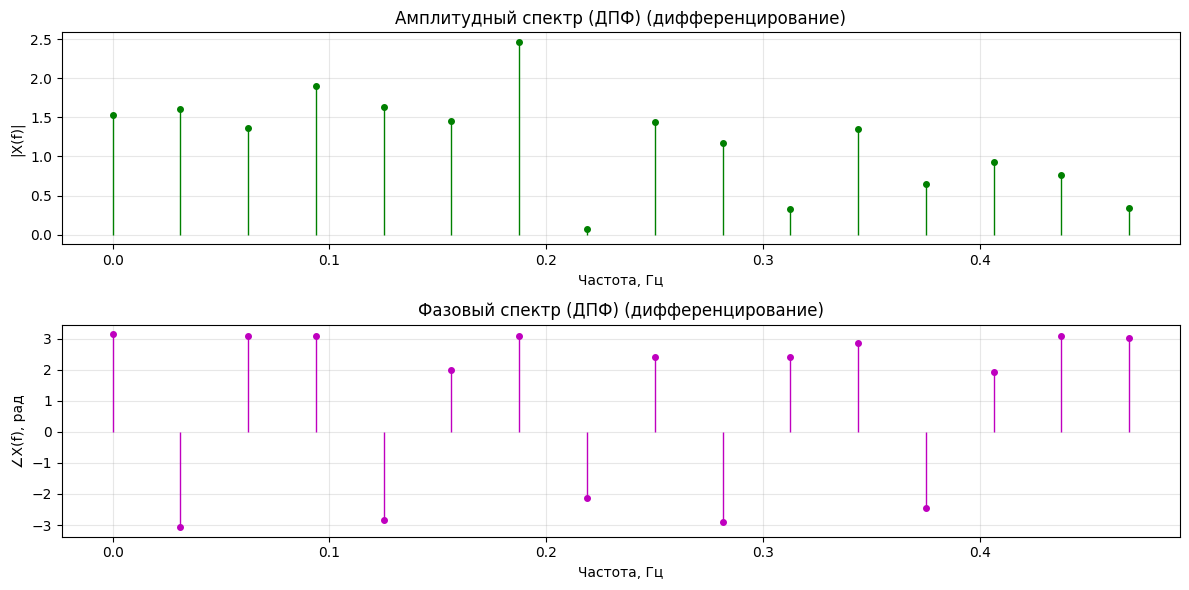

In [11]:
X_discrete = np.fft.fft(x_derivative)
freqs = np.fft.fftfreq(N, T)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_discrete[:N//2]), 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title('Амплитудный спектр (ДПФ) (дифференцирование)')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.angle(X_discrete[:N//2]), 'm-', basefmt=' ')
plt.setp(stemlines, 'color', 'm', 'linewidth', 1)
plt.setp(markerline, 'color', 'm', 'markersize', 4)
plt.title('Фазовый спектр (ДПФ) (дифференцирование)')
plt.xlabel('Частота, Гц')
plt.ylabel('∠X(f), рад')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

б)

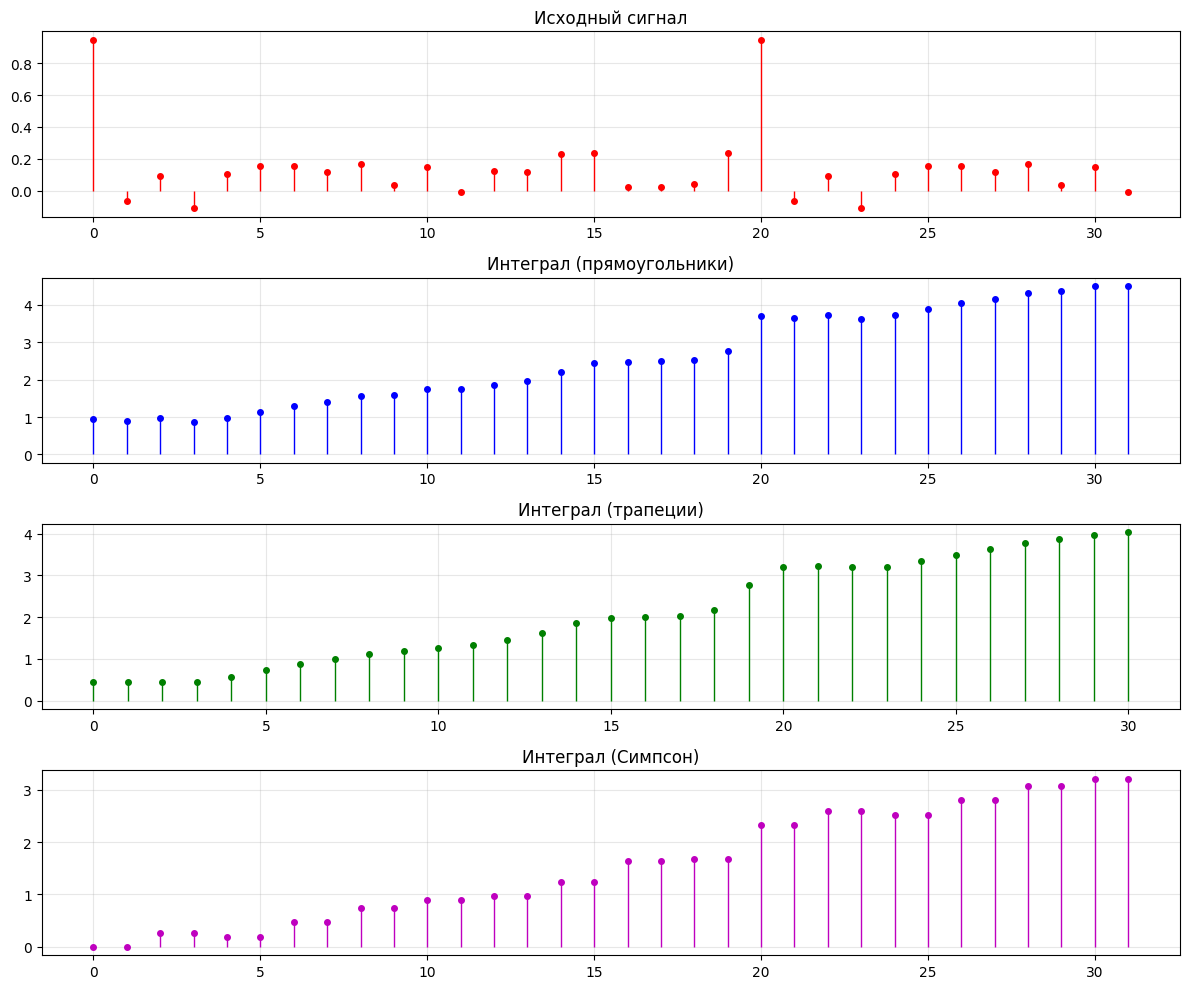

In [12]:
def integrate_rectangular(signal, T=1):
    return np.cumsum(signal) * T

def integrate_trapezoidal(signal, T=1):
    return np.cumsum((signal[:-1] + signal[1:])/2) * T

def integrate_simpson(signal, T=1):
    n = len(signal)
    result = np.zeros(n)
    for i in range(1, n):
        if i % 2 == 0:
            result[i] = result[i-1] + T/3 * (signal[i-2] + 4*signal[i-1] + signal[i])
        elif i > 1:
            result[i] = result[i-1]
    return result

x_integral_rect = integrate_rectangular(x_discrete, T)
x_integral_trap = integrate_trapezoidal(x_discrete, T)
x_integral_simp = integrate_simpson(x_discrete, T)

# Передаточные функции
def H_integral_rect(omega, T=1):
    return T / (1 - np.exp(-1j*omega*T))

def H_integral_trap(omega, T=1):
    return T/2 * (1 + np.exp(-1j*omega*T)) / (1 - np.exp(-1j*omega*T))

# Визуализация
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
markerline, stemlines, baseline = plt.stem(t_discrete, x_discrete, 'r-', basefmt=' ')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
plt.setp(markerline, 'color', 'r', 'markersize', 4)
plt.title('Исходный сигнал')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 2)
markerline, stemlines, baseline = plt.stem(t_discrete[:len(x_integral_rect)], x_integral_rect, 'b-', basefmt=' ')
plt.setp(stemlines, 'color', 'b', 'linewidth', 1)
plt.setp(markerline, 'color', 'b', 'markersize', 4)
plt.title('Интеграл (прямоугольники)')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 3)
markerline, stemlines, baseline = plt.stem(t_discrete[:len(x_integral_trap)], x_integral_trap, 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title('Интеграл (трапеции)')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 4)
markerline, stemlines, baseline = plt.stem(t_discrete[:len(x_integral_simp)], x_integral_simp, 'm-', basefmt=' ')
plt.setp(stemlines, 'color', 'm', 'linewidth', 1)
plt.setp(markerline, 'color', 'm', 'markersize', 4)
plt.title('Интеграл (Симпсон)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

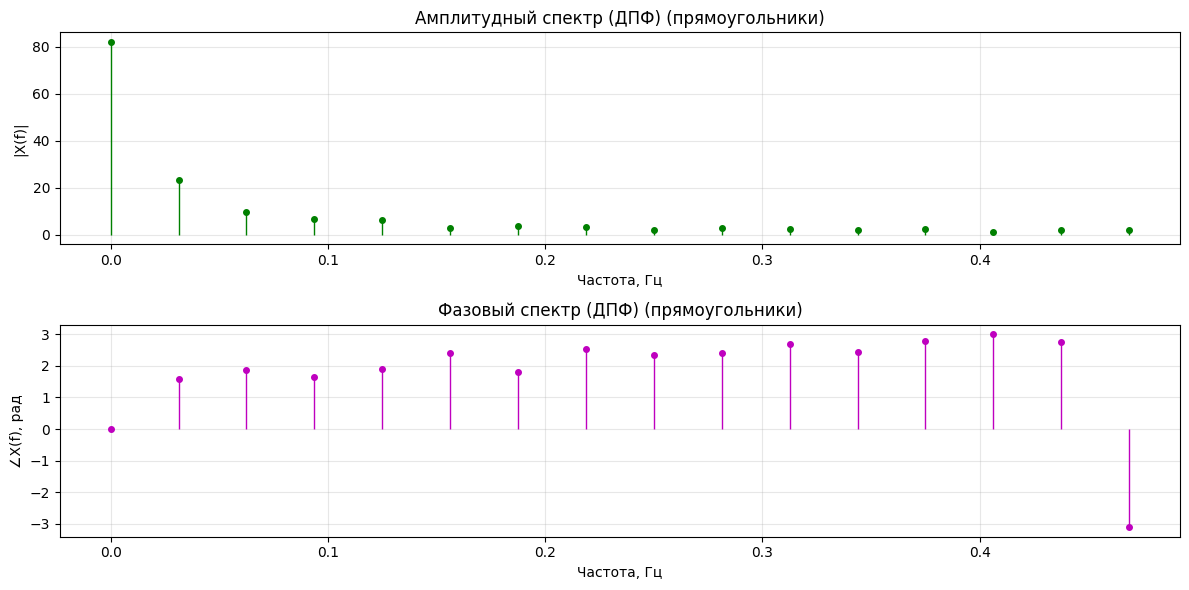

In [13]:
X_discrete = np.fft.fft(x_integral_rect)
freqs = np.fft.fftfreq(N, T)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_discrete[:N//2]), 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title('Амплитудный спектр (ДПФ) (прямоугольники)')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.angle(X_discrete[:N//2]), 'm-', basefmt=' ')
plt.setp(stemlines, 'color', 'm', 'linewidth', 1)
plt.setp(markerline, 'color', 'm', 'markersize', 4)
plt.title('Фазовый спектр (ДПФ) (прямоугольники)')
plt.xlabel('Частота, Гц')
plt.ylabel('∠X(f), рад')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

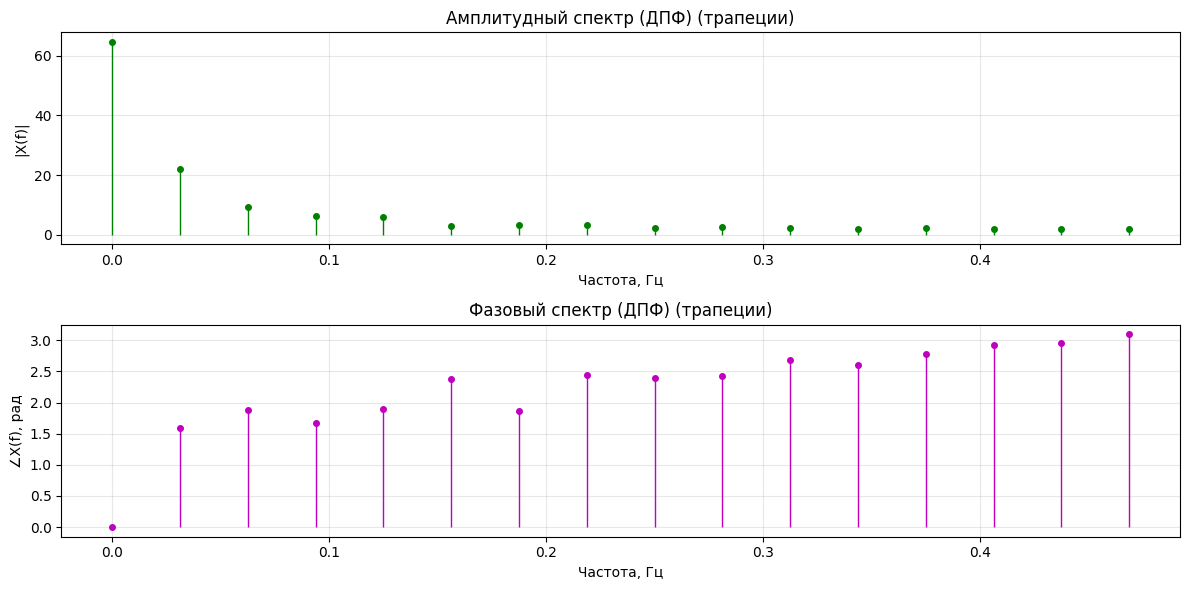

In [14]:
X_discrete = np.fft.fft(x_integral_trap)
freqs = np.fft.fftfreq(N, T)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_discrete[:N//2]), 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title('Амплитудный спектр (ДПФ) (трапеции)')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.angle(X_discrete[:N//2]), 'm-', basefmt=' ')
plt.setp(stemlines, 'color', 'm', 'linewidth', 1)
plt.setp(markerline, 'color', 'm', 'markersize', 4)
plt.title('Фазовый спектр (ДПФ) (трапеции)')
plt.xlabel('Частота, Гц')
plt.ylabel('∠X(f), рад')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

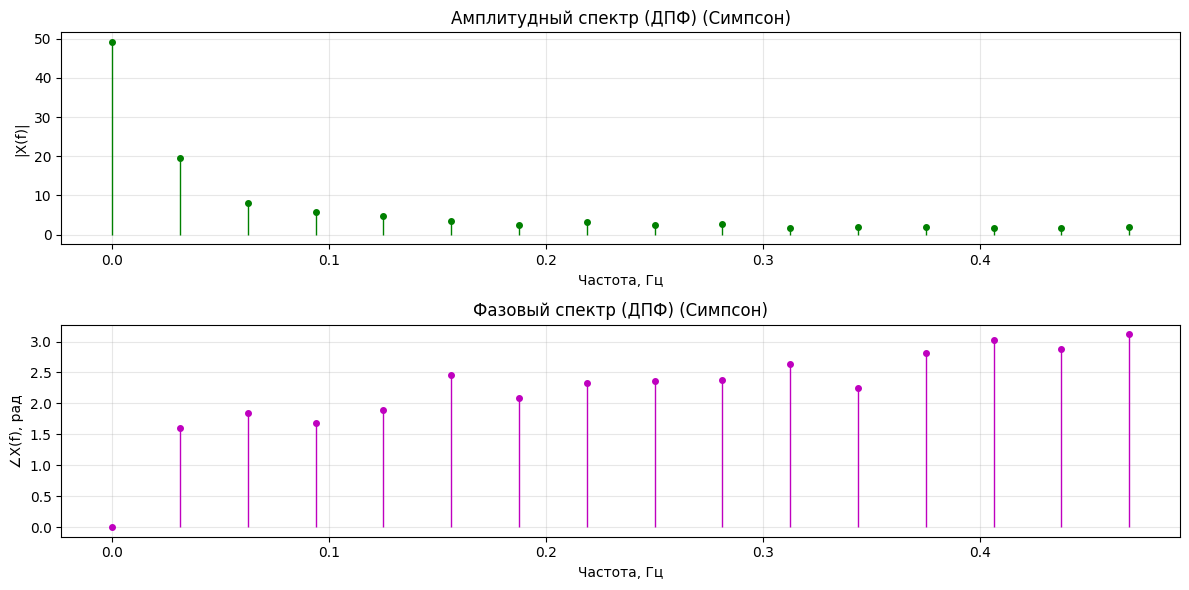

In [15]:
X_discrete = np.fft.fft(x_integral_simp)
freqs = np.fft.fftfreq(N, T)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.abs(X_discrete[:N//2]), 'g-', basefmt=' ')
plt.setp(stemlines, 'color', 'g', 'linewidth', 1)
plt.setp(markerline, 'color', 'g', 'markersize', 4)
plt.title('Амплитудный спектр (ДПФ) (Симпсон)')
plt.xlabel('Частота, Гц')
plt.ylabel('|X(f)|')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(freqs[:N//2], np.angle(X_discrete[:N//2]), 'm-', basefmt=' ')
plt.setp(stemlines, 'color', 'm', 'linewidth', 1)
plt.setp(markerline, 'color', 'm', 'markersize', 4)
plt.title('Фазовый спектр (ДПФ) (Симпсон)')
plt.xlabel('Частота, Гц')
plt.ylabel('∠X(f), рад')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

###Выводы

В ходе лабораторной работы были исследованы рекурсивные фильтры, построенные на основе формул численного дифференцирования и интегрирования.

Основные результаты:

1. Сформирован тестовый сигнал из 11 гармоник с частотами от 0 до $\pi$ с шагом $0.1\pi$, случайными амплитудами и начальными фазами. Сигнал содержит 32 отсчёта при шаге дискретизации $T=1$.

2. Исследованы фильтры линейного сглаживания по 5 и 9 точкам. Установлено, что они являются фильтрами нижних частот (ФНЧ). Экспериментально подтверждено, что увеличение ширины окна сужает полосу пропускания и усиливает подавление высокочастотных составляющих. Результаты соответствуют теоретическим передаточным функциям $H_5(\omega)$ и $H_9(\omega)$.

3. Исследован дифференцирующий фильтр на основе разностей назад. Подтверждено, что он является фильтром верхних частот (ФВЧ): усиливает высокочастотные составляющие и полностью подавляет постоянную составляющую. Экспериментальная АЧХ соответствует теоретической $|H_D(\omega)| = \frac{2}{T}|\sin\frac{\omega T}{2}|$.

4. Исследованы интегрирующие фильтры (методы прямоугольников, трапеций и Симпсона). Все три метода являются ФНЧ с накоплением и усиливают низкочастотные составляющие сигнала. Метод Симпсона обеспечивает наивысшую точность аппроксимации интеграла.

5. Выполнена верификация результатов: для всех фильтров экспериментально подтверждено основное соотношение $Y(\omega) = H(\omega) \cdot X(\omega)$. Отношение спектров выходного и входного сигналов соответствует теоретическим значениям АЧХ.
